In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

URL = "https://en.wikipedia.org/wiki/List_of_ships_of_the_People%27s_Liberation_Army_Navy"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

tables = soup.find_all('table', class_="wikitable")

print(type(tables))

<class 'bs4.element.ResultSet'>


In [2]:
sub_table_str = str(tables[0])
df = pd.read_html(StringIO(sub_table_str))[0]

df.head()

# df.to_csv('testtable.csv')

,Type,NATO designation,Pennant No.,Name (English),Name (Han 汉),Commissioned,Displacement[a],Fleet,Status
0,Type 094 / 094A submarine,Jin class,411,Long March 11,长征 11,2007,"11,000 t",South Sea Fleet,Active
1,Type 094 / 094A submarine,Jin class,413,Long March 13,长征 13,2009,"11,000 t",South Sea Fleet,Active
2,Type 094 / 094A submarine,Jin class,412,Long March 12,长征 12,2011,"11,000 t",South Sea Fleet,Active
3,Type 094 / 094A submarine,Jin class,414,Long March 14,长征 14,2012,"11,000 t",South Sea Fleet,Active
4,Type 094 / 094A submarine,Jin class,420,Long March 20,长征 20,2019,"11,000 t",South Sea Fleet,Active


In [3]:
dataframes = []

for table in tables:
    table_str = str(table)
    df = pd.read_html(StringIO(table_str))[0]
    dataframes.append(df)
    
for i, df in enumerate(dataframes):
    print(f"Table {i + 1}:")
    print(df.head()) 
    


Table 1:
                        Type NATO designation  Pennant No. Name (English)  \
0  Type 094 / 094A submarine        Jin class          411  Long March 11   
1  Type 094 / 094A submarine        Jin class          413  Long March 13   
2  Type 094 / 094A submarine        Jin class          412  Long March 12   
3  Type 094 / 094A submarine        Jin class          414  Long March 14   
4  Type 094 / 094A submarine        Jin class          420  Long March 20   

  Name (Han 汉)  Commissioned Displacement[a]            Fleet  Status  
0        长征 11          2007        11,000 t  South Sea Fleet  Active  
1        长征 13          2009        11,000 t  South Sea Fleet  Active  
2        长征 12          2011        11,000 t  South Sea Fleet  Active  
3        长征 14          2012        11,000 t  South Sea Fleet  Active  
4        长征 20          2019        11,000 t  South Sea Fleet  Active  
Table 2:
                 Type NATO designation     Pennant No.  Name (English)  \
0  Type 032 s

In [5]:
merged_df = pd.concat(dataframes, ignore_index=True)

print(merged_df.to_string())


merged_df.to_csv('/home/hurr_son/repos/OSINT/PLA/data/PLAN_Vessels_Wikipedia.csv')

                                                                              Type                 NATO designation                            Pennant No.                                 Name (English) Name (Han 汉)                     Commissioned Displacement[a]                                Fleet                                 Status        Displacement           Name (Han 中文)  VLS Cells      Classification
0                                                        Type 094 / 094A submarine                        Jin class                                    411                                  Long March 11        长征 11                             2007        11,000 t                      South Sea Fleet                                 Active                 NaN                     NaN        NaN                 NaN
1                                                        Type 094 / 094A submarine                        Jin class                                    413                

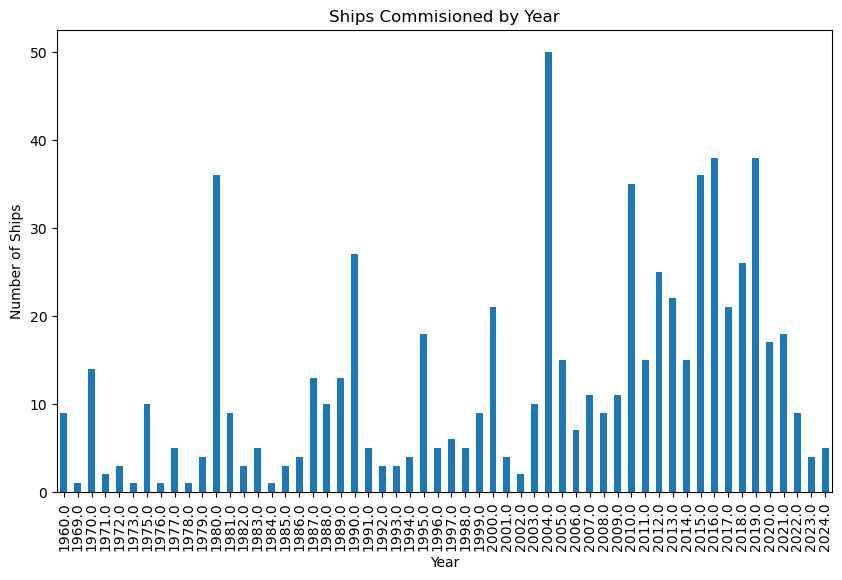

In [10]:
import matplotlib.pyplot as plt

if "Commissioned" in merged_df.columns:
    
    # Remove any non-numeric characters
    merged_df["Commissioned"] = merged_df["Commissioned"].str.extract('(\d{4})').astype(float)
    
    # Remove where 'Commissioned' is missing
    merged_df = merged_df.dropna(subset=["Commissioned"])
    
    plt.figure(figsize=(10,6))
    merged_df["Commissioned"].value_counts().sort_index().plot(kind='bar')
    plt.title('Ships Commisioned by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ships')
    plt.show()   
    
    